In [4]:
!pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB 330.3 kB/s eta 0:00:23
     ---------------------------------------- 0.0/7.5 MB 281.8 kB/s eta 0:00:27
      --------------------------------------- 0.1/7.5 MB 656.4 kB/s eta 0:00:12
      --------------------------------------- 0.2/7.5 MB 807.1 kB/s eta 0:00:10
     - -------------------------------------- 0.2/7.5 MB 695.5 kB/s eta 0:00:11
     - -------------------------------------- 0.4/7.5 MB 1.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.4/7.5 MB 1.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/7.5 MB 1.3 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/7.5 MB 1.3 MB/s eta 0:00:06
     --- ------------------------------------ 0.7/7.5 MB 1.5 MB/s eta 0:00:05
     ---- --

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [6]:
df= pd.read_csv("heart.data.csv")

In [7]:
df.head()

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [8]:
df.drop("Unnamed: 0",axis=1)

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224
...,...,...,...
493,47.660440,27.562464,11.294392
494,45.097203,21.385620,9.616762
495,8.279743,6.423720,13.495168
496,42.345863,20.741328,10.115865


C:\Users\nilas\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


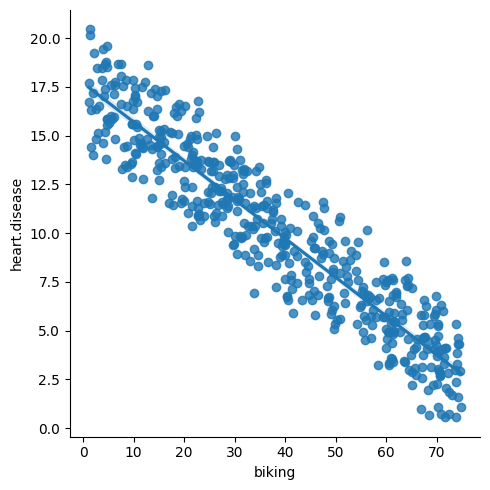

In [9]:
sns.lmplot(x='biking',y='heart.disease',data=df)

C:\Users\nilas\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


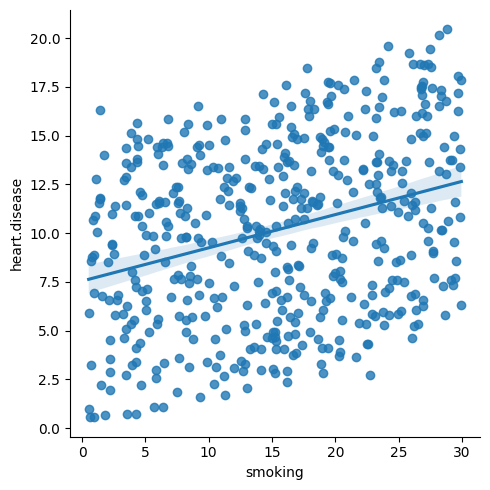

In [10]:
sns.lmplot(x='smoking',y='heart.disease',data=df)

In [11]:
X= df.drop('heart.disease',axis=1)

In [12]:
y= df['heart.disease']

In [13]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=42)

In [14]:
model= linear_model.LinearRegression()

In [15]:
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9814477666661077

In [16]:
prediction_test= model.predict(X_test)
print(y_test,prediction_test)

487     6.756015
73      9.466026
231    14.088654
175    13.377430
237    16.384678
         ...    
193    14.547755
5       9.550046
116    14.411483
45     12.328899
16      5.443342
Name: heart.disease, Length: 150, dtype: float64 [ 5.48253875  9.36377003 15.77978944 14.00373175 16.98468422 13.27332145
  7.09214206  9.59945205  6.79290044 12.23554026  8.14547336 10.1296392
  5.85628745 10.17453836  7.45859137 17.55496357  4.04373555  7.00624197
  5.31630875  6.60945648  2.07060196  7.39210543 11.87041109 14.10903974
 12.20470717 13.71881487  6.11166243  9.40547243 14.04136561 11.93991626
  8.38912064 11.60567686 12.48980606 17.88357907  3.49728365  6.20846875
  8.19135166  7.53405691 12.45042475 10.46098913  4.93416509  3.88877045
  7.94051611 10.86414163 10.93021725  9.0203609  16.99696374  7.57501693
 18.17687435  4.53692347  1.71392047  4.88628785  6.73384615 15.32396589
  9.45469712  6.28562094  8.28491377 10.21001403 13.67708607  3.53357746
  7.23840208  6.80534623 13.5563722

In [17]:
print("Mean squared error between y_test and predicted test = ",np.mean(prediction_test-y_test)**2)

Mean squared error between y_test and predicted test =  0.0006753631796162266


In [18]:
import pickle

In [19]:
pickle.dump(model,open('model.pkl','wb'))

In [20]:
model= pickle.load(open('model.pkl','rb'))

In [21]:
print(model.predict([[20.1,56.3,34.23]]))

[9.9709274]


C:\Users\nilas\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# Feature Importance
# print(model.coef_,model.intercept_)

In [23]:
# print(model.predict([[13,2,12]]))